<br>

<br>

<a id='bostonpred'></a>
# Boston Housing Price Prediction
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

| Code   | <center>Description</center>   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | percentage lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

<br>

<br>

# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline

In [2]:
col_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('Data/housing.data', 
                 header=None, 
                 delim_whitespace=True, 
                 names=col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<br>

<br>

#### A simple Linear Regression between *M=(Number of rooms)* and *MEDV=(Median-Price)*

Slope: [9.10210898]
Intercept -34.67062077643857




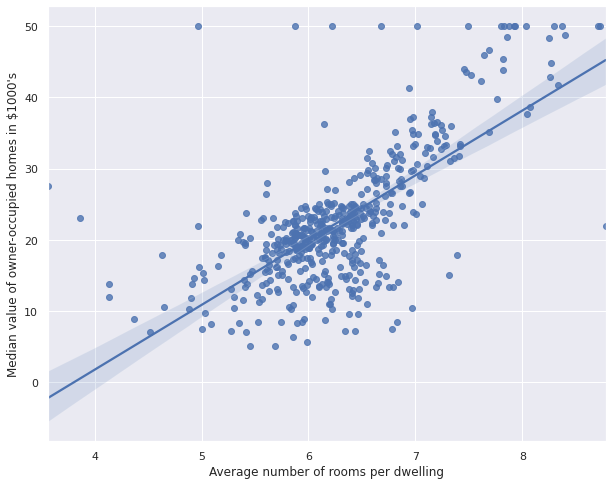

In [3]:
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

model = LinearRegression()
model.fit(X,y)

print(f'Slope: {model.coef_}') 
print(f'Intercept {model.intercept_}\n\n')

plt.figure(figsize=(10,8))
sns.regplot(X,y)
plt.xlabel('Average number of rooms per dwelling') # X => RM
plt.ylabel("Median value of owner-occupied homes in $1000's") # y => MEDV
plt.show()

<br>

<br>

### Exploring the Housing Dataset using `mlxtend` package

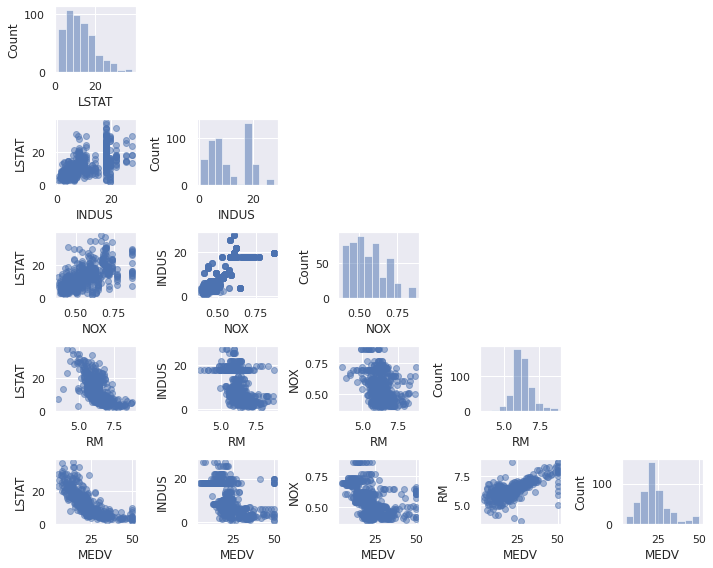

In [4]:
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, 
                  figsize=(10, 8), 
                  names=cols, 
                  alpha=0.5)
plt.tight_layout()
plt.show()

<br>

<br>

### Data distribution among four different columns using `sns.pairplot()`

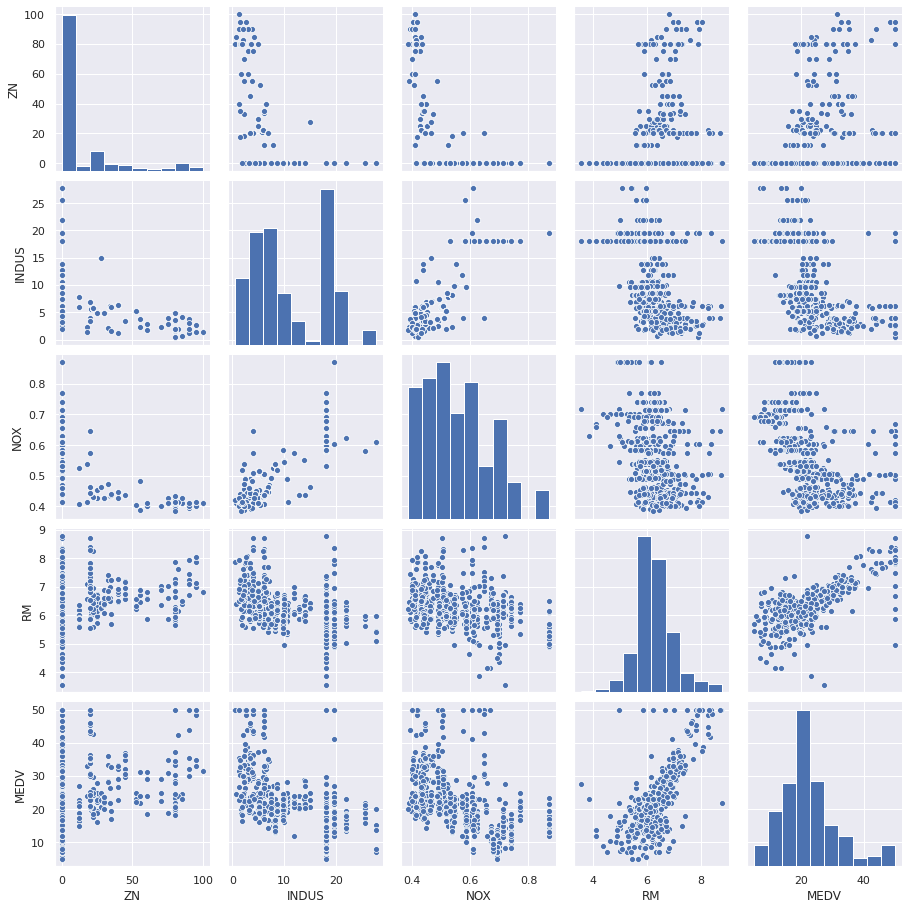

In [5]:
col = ['ZN' , 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[col])

plt.show()

<br>

<br>

## Correlation Analysis and Feature Selection

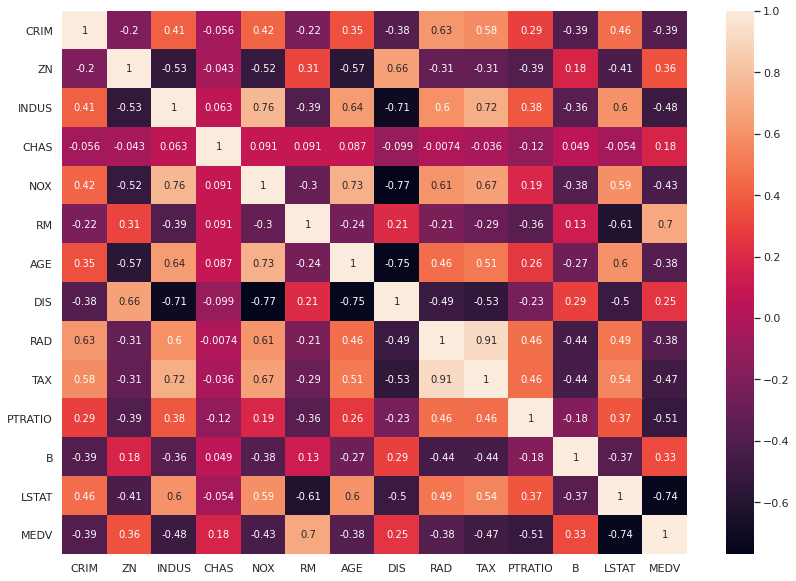

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

<br>

<br>

#### Same analysis, but this time with`sns.jointplot` on different columns

PTRATIO: pupil-teacher ratio by town <br>
MEDV: Median-Price

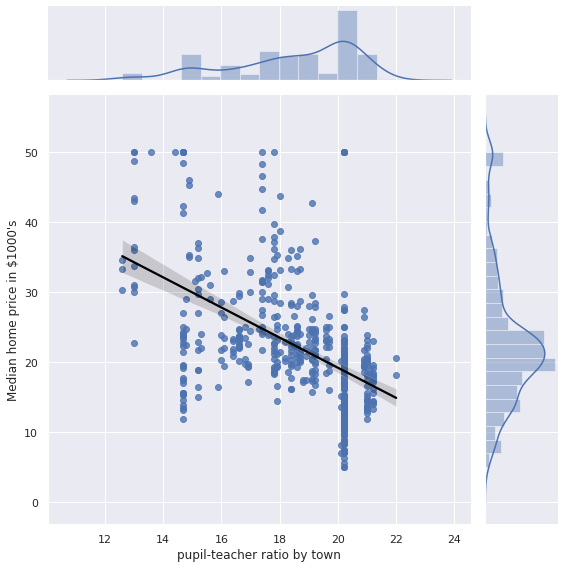

In [7]:
sns.jointplot(x='PTRATIO',
              y='MEDV', 
              data=df, 
              kind='reg', 
              height=8,
              joint_kws={'line_kws':{'color':'black'}})

plt.xlabel('pupil-teacher ratio by town') 
plt.ylabel("Median home price in $1000's") 

plt.show()

<br>


#### Note:

A predictor(indepenent variable) that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable(dependant variable).Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

<br>

<br>

### Let's try the same analysis on different independent varibles


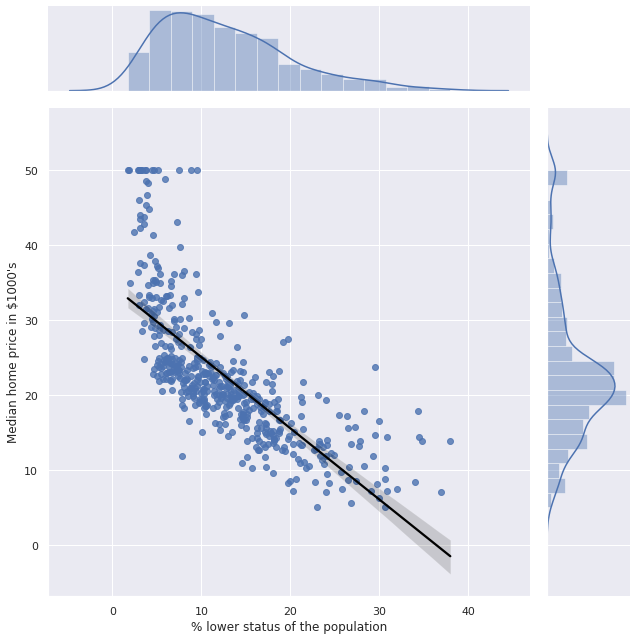

In [8]:
# plt.figure(figsize=(15,10))
# sns.regplot(X,y)
sns.jointplot(x='LSTAT',
              y='MEDV', 
              data=df, 
              kind='reg',
              height=9,
              joint_kws={'line_kws':{'color':'black'}})

plt.xlabel('% lower status of the population') 
plt.ylabel("Median home price in $1000's") 

plt.show()

<br>

#### Observation
This linear model is not a good and suitable model for this data. It's obvious that there is a non-linear relationship between these two features. we gotta use polynomial, we also should consider the fact that there are outliers in this relationship.

---

<br>

<br>


# Robust Regression

Play with this program and add outliers and notice the differences with and without outliers. [Outlier Demo](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)



**Note:** Linear Regression is heavily impacted by presence of outliers. Outliers can completely destroy the linear regression fit. Robust Regression instead of working with the whole dataset, it automatically sample and try to identify the outliers and exclude them from the actual modeling itself.

### RANdom SAmple Consensus [(RANSAC) Algorithm](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)



**Note:** RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.

#### How RANSAC algorithm works:
1. Select a random number of examples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Refit the model using all the inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise.

<br>

<br>

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


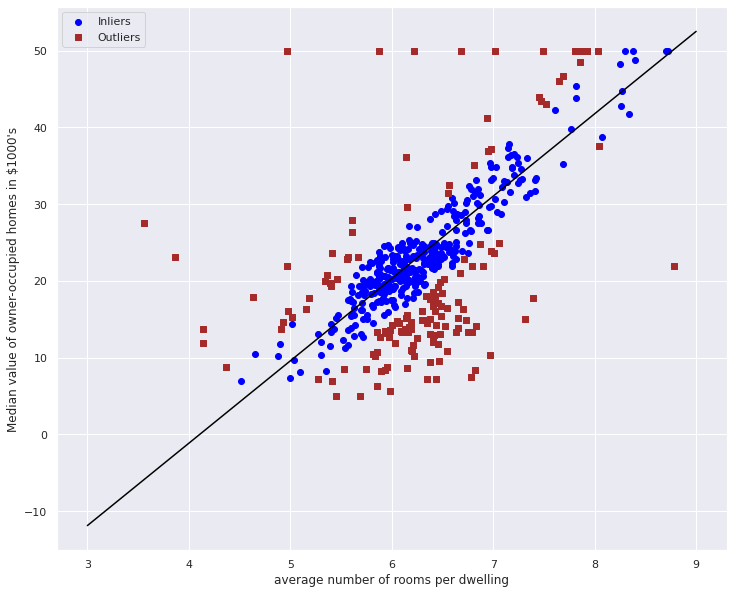

In [10]:
from sklearn.linear_model import RANSACRegressor

X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

# ransac_reg = RANSACRegressor()
ransac_reg = RANSACRegressor(base_estimator=LinearRegression(), 
                             max_trials=100, 
                             min_samples=50, 
                             loss='absolute_loss', 
                             residual_threshold=5.0, 
                             random_state=0)
ransac_reg.fit(X, y)


inlier_mask = ransac_reg.inlier_mask_   # inlier
outlier_mask = np.logical_not(inlier_mask) # outliers

line_X = np.arange(3,10,1) # draw a line from 3 to 9 with the step of 1
line_y_ransac = ransac_reg.predict(line_X.reshape(-1,1))

plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')

plt.show()

<br>

<br>

#### Observation
-  max_trials = 100
    - Maximum number of iterations
- min_sample = 50
    - Minimum number of the randomly chosen training examples is 50.
- residual_threshold = 5.0
    - We only allow training examples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units.    
- logical_not() : anything that is not in inlier_mask
- *inlier_mask* and *outlier_mask's* values are boolians

<br>

<br>

#### Let's try it on two different variables. `LSTAT` and `MEDV`



Residual Threshold is 5


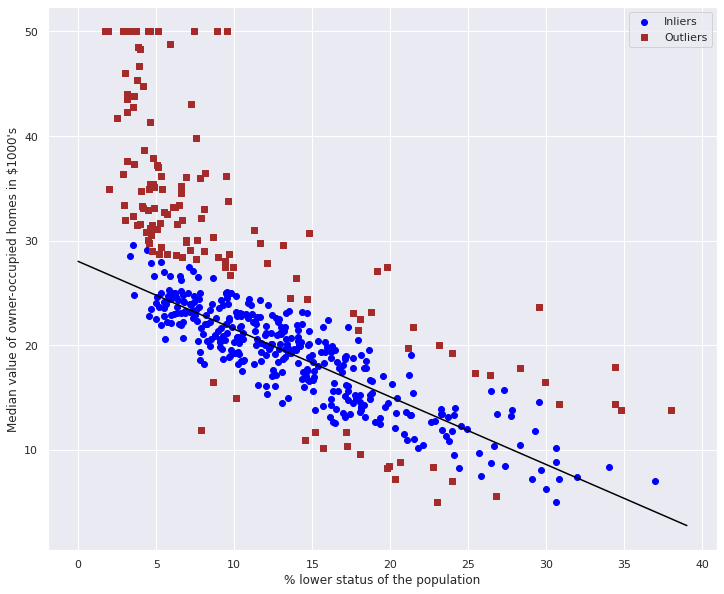



Residual Threshold is 7


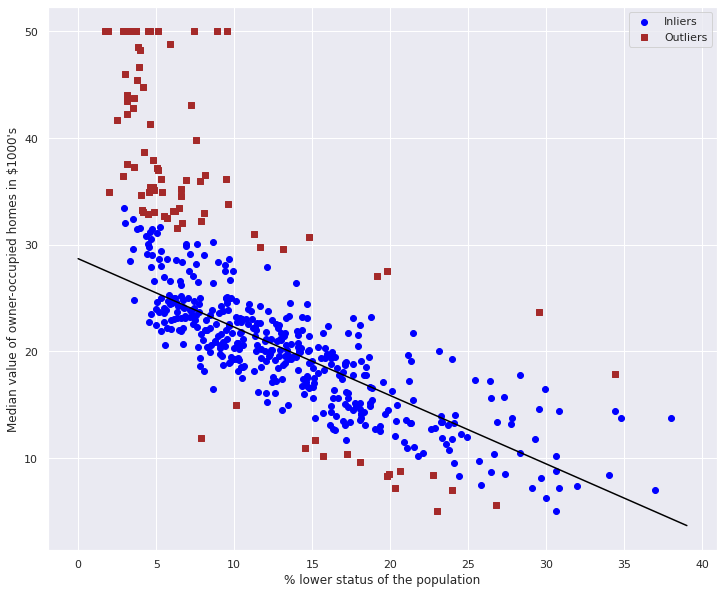



Residual Threshold is 9


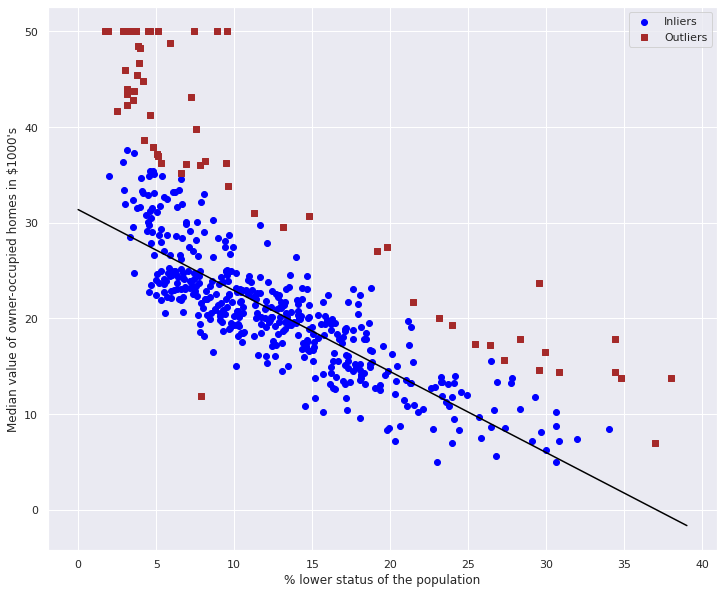

In [11]:
for i in range(5, 10, 2):
    # Train data
    ransac = RANSACRegressor(residual_threshold=i) # set the residual threshold to 2
    X = df['LSTAT'].values.reshape(-1,1)  # percentage lower status of the population
    y = df['MEDV'].values
    ransac.fit(X, y)

    # calculate inliers and outliers based on residual threshold
    inlier_mask = ransac.inlier_mask_  
    outlier_mask = np.logical_not(inlier_mask)

    line_X = np.arange(0, 40, 1) # X-axis
    line_y_ransac = ransac.predict(line_X.reshape(-1, 1)) # prediction

    # Visualization
    print(f'\n\nResidual Threshold is {i}')
    sns.set(style='darkgrid', context='notebook')
    plt.figure(figsize=(12,10));
    plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='black')
    plt.xlabel('% lower status of the population')
    plt.ylabel("Median value of owner-occupied homes in $1000's")
    plt.legend(loc='upper right')
    plt.show()

---

<br>

<br>

## Performance Evaluation of Regression Model
- There are three different methods to evaluate performance on regression models:
    - Residual Analysis
    - Mean Squared Error (MSE)
    - Coefficient of Determination, $R^2$

<br>

<br>

### Method 1: Residual Analysis

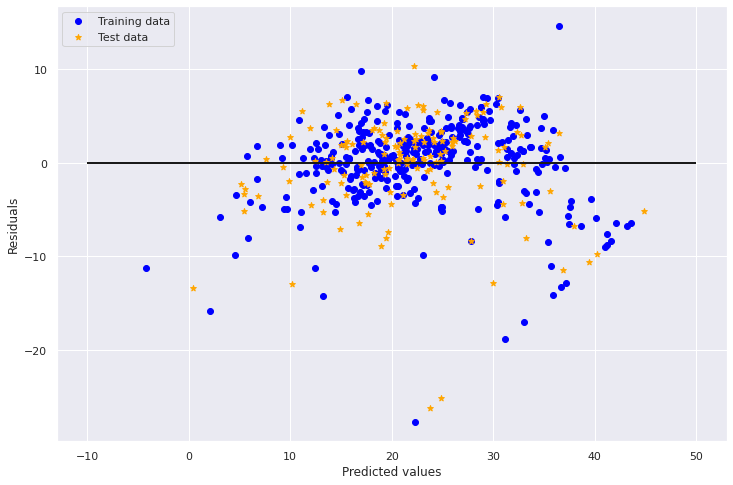

In [12]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df.iloc[:,:-1]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
lr_cls = LinearRegression()
lr_cls.fit(X_train, y_train)

y_train_pred = lr_cls.predict(X_train)
y_test_pred = lr_cls.predict(X_test)



# Residual Analysis
plt.figure(figsize=(12,8))

plt.scatter(x=y_train_pred, 
            y=y_train_pred - y_train, 
            c='blue', 
            marker='o', 
            label='Training data') # training data

plt.scatter(x=y_test_pred, 
            y=y_test_pred - y_test, 
            c='orange', 
            marker='*', 
            label='Test data')      # test data

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')

plt.show()

<br>

#### Observation
- In this model we have some outliers. There are some sort of linear structure in the data.

- The actual range in y-axis(Residuals axis) is substantially large, between -20 to 10.

- Residual plots are a commonly used graphical tool for diagnosing regression models. They can help to detect nonlinearity annd outliers and check whether the errors are randomly distributed.

- In a perfect model the distribution of data in y_axis should be consistent and they should be in a same range, for example between +3 and -3 and not something like -20 and +10.
    - To get a better understanding of this matter, notice *the near perfect model* in the following cells below.


- We can notice that they are pretty consistent. They are pretty much in the same range between +3 and -3 (y-axis)

<br>

<br>

### Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

- The average value of the Sums of Squared Error cost function  
- Useful for comparing different regression models 
- For tuning parameters via a grid search and cross-validation

In [13]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df.iloc[:,:-1]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
lr_cls = LinearRegression()
lr_cls.fit(X_train, y_train)

y_train_pred = lr_cls.predict(X_train)
y_test_pred = lr_cls.predict(X_test)



# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

print(f'\nMSE Training: {mean_squared_error(y_train, y_train_pred):.5}')
print(f'MSE Test: {mean_squared_error(y_test, y_test_pred):.5}')


MSE Training: 19.958
MSE Test: 27.196


<br>

#### Observation
- The smaller the number, the better it is. We try to minimize the MSE.
- The model performed better on training data in comparison with test data. The error is gone up in test data.

<br>

<br>


### Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

**SSE:** In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared errors of prediction (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy [di skréppənsee] or difference between the data and an estimation model. A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

**SST:** In statistical linear models, (particularly in standard regression models), the (TSS or SST) is the sum of the squares of the difference of the dependent variable and its mean.


**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

For more information follow this [link](https://en.wikipedia.org/wiki/Coefficient_of_determination)

<br>


  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$<br>
    The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$ <br>
    The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

<br>

<br>


In [14]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df.iloc[:,:-1]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
lr_cls = LinearRegression()
lr_cls.fit(X_train, y_train)

y_train_pred = lr_cls.predict(X_train)
y_test_pred = lr_cls.predict(X_test)



# Coefficient of Determination
from sklearn.metrics import r2_score

print(f'R^2 of Training Data: {r2_score(y_train, y_train_pred):.5}')
print(f'R^2 of Test Data: {r2_score(y_test, y_test_pred):.5}')

R^2 of Training Data: 0.76455
R^2 of Test Data: 0.67338


<br>

#### Observation
- The higher the number, the better it is.   
    - 1 = Prefect explanation | 0 = Unable to explain anything
- The model performed better on training data in comparison with test data. The $R^2$ is gone down in test data.

<br>

<br>


<br>

## What does a Near Perfect Model Looks like?


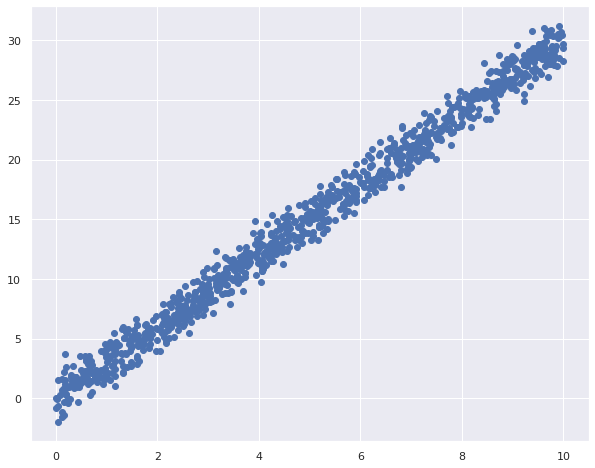

In [15]:
generate_random = np.random.RandomState(0)
x_perfect_model = 10 * generate_random.rand(1000)
y_perfect_model = 3 * x_perfect_model + np.random.randn(1000) # (3*x + some noise) 
plt.figure(figsize = (10, 8))
plt.scatter(x_perfect_model, y_perfect_model);
plt.show()

<br>

<br>

### Method 1: Residual Analysis

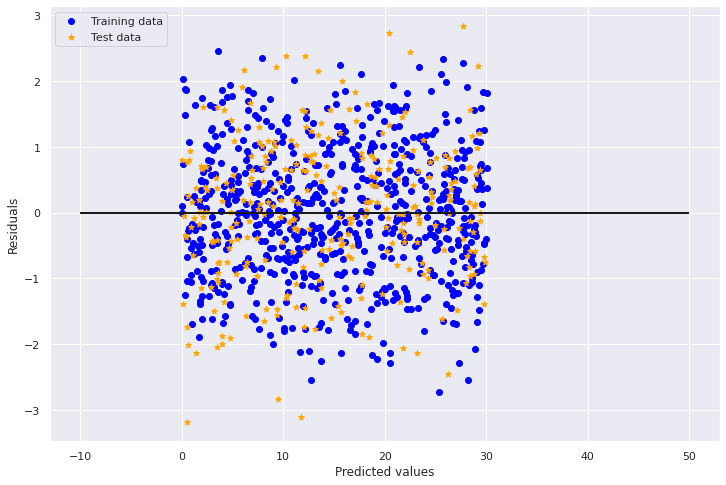

In [16]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x_perfect_model, 
                                                    y_perfect_model, 
                                                    test_size=0.3, 
                                                    random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)



# Residual Analysis
plt.figure(figsize=(12,8))

plt.scatter(x=y_train_pred, 
            y=y_train_pred - y_train, 
            c='blue', 
            marker='o', 
            label='Training data') # training data

plt.scatter(x=y_test_pred, 
            y=y_test_pred - y_test, 
            c='orange', 
            marker='*', 
            label='Test data')      # test data

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')

plt.show()

<br>

#### Observation
- We can notice that the data distribution is pretty consistent in y-axis. They are pretty much in the same range between -4 and +3 

<br>

<br>

### Method 2: Mean Squared Error (MSE)

In [17]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x_perfect_model, 
                                                    y_perfect_model, 
                                                    test_size=0.3, 
                                                    random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)



# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

print(f'\nMSE Training: {mean_squared_error(y_train, y_train_pred):.5}')
print(f'MSE Test: {mean_squared_error(y_test, y_test_pred):.5}')


MSE Training: 0.98214
MSE Test: 1.0781


<br>

#### Observation
- The smaller the number, the better it is. We try to minimize the MSE

<br>

<br>

### Method 3: Coefficient of Determination, $R^2$

In [18]:
# Training the Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x_perfect_model, 
                                                    y_perfect_model, 
                                                    test_size=0.3, 
                                                    random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


# Coefficient of Determination
from sklearn.metrics import r2_score

print(f'\nR^2 of Training Data: {r2_score(y_train, y_train_pred):.3}')
print(f'R^2 of Test Data: {r2_score(y_test, y_test_pred):.3}')


R^2 of Training Data: 0.987
R^2 of Test Data: 0.986


<br>

#### Observation
- The higher the number, the better it is.   
    - 1 = Prefect explanation | 0 = Unable to explain anything
- The model performed better on training data in comparison with test data. The $R^2$ is gone down in test data.

<br>

<br>


---

<br>

<br>

# Multiple Regression

Simple Linear Regression:

$\beta_0$ is intercept, $\beta_1$ is coefficient(slope) and $X$ is the target variable.

$$y = \beta_0 + \beta_1X$$

Multiple Linear Regression:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

**Note:** simple linear regression is linear regression with univariate, meaning single feature to explain our target variable. In multiple regression we are looking at multiple features to predict the target variable.

<br>

<br>

To get more information check out the following links:
- [Multiple Rgression - Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
- [Multiple Rgression - Statsoft](http://www.statsoft.com/Textbook/Multiple-Regression)

<br>



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline


col_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('Data/housing.data', 
                 header=None, 
                 delim_whitespace=True, 
                 names=col_names)

X = df.iloc[:,:-1]
y = df['MEDV']


df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<br>

### Statsmodels

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

https://www.statsmodels.org/stable/index.html

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_constant = sm.add_constant(X)
pd.DataFrame(X_constant).head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


<br>

#### Observation
- We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.

<br>

<br>

In [21]:
model = sm.OLS(y,X_constant)
multiple_lr = model.fit()

multiple_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        22:28:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

<br>

### Model Statistical Outputs:

- **Dep. Variable**: The dependent variable or target variable

- **Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

- **Method**: The method used to fit the data to the model. Least squares

- **No. Observations**: The number of observations

- **DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters. 
    - DF Residuals = Number of Observations - Number of parameters => 506 - (13 variables + 1 constant) = 492


- **DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.

<br>

<br>

**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$


**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.

$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

$p$ = The total number of explanatory variables not including the constant term

$n$ = The sample size

**Note:** The more parameters we add to the model, typically the ${R}^2$ goes up but it's not significant. Adj. R-squared penalizes the additional parameters we put in which don't actually add much to the explanation of the underlying variability. Typicaly Adj. R-squared is used when we are comparing multiple regression models.


**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters. The smaller the number, the better it is.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

![](Images/skewness.jpg)

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

![](Images/kurtosis.png)

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results


<em>Multicollinearity</em> exists whenever two or more of the predictors(so called `independent variables`) in a regression model are moderately or highly correlated.

<br>

https://onlinecourses.science.psu.edu/stat501/node/344/<br>
https://en.wikipedia.org/wiki/Multicollinearity

<br>


<br>

<br>

Let's try on a different set of features with a different approach but same output

In [22]:
form_lr = smf.ols(formula = 'y ~ CRIM +  NOX + RM + DIS + RAD + PTRATIO + B + LSTAT', data=df)
mlr = form_lr.fit()

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     162.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          1.19e-133
Time:                        22:28:53   Log-Likelihood:                -1514.6
No. Observations:                 506   AIC:                             3047.
Df Residuals:                     497   BIC:                             3085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6917      5.180      6.891      0.000      25.515      45.869
CRIM          -0.1029      0.034     -3.071      0.002      -0.169      -0.037
NOX          -20.1419      3.517     -5.727      0.000     -27.052     -13.231
RM             4.1746      0.411     10.157      0.000       3.367       4.982
DIS           -1.2148      0.165     -7.360      0.000      -1.539      -0.890
RAD            0.1458      0.041      3.544      0.000       0.065       0.227
PTRATIO       -1.1663      0.124     -9.432      0.000      -1.409      -0.923
B              0.0102      0.003      3.719      0.000       0.005       0.016
LSTAT         -0.5332      0.049    -10.949      0.000      -0.629      -0.438
==============================================================================
Omnibus:                      182.899   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.907
Skew:                           1.563   Prob(JB):                    1.83e-177
Kurtosis:                       8.369   Cond. No.                     9.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

<br>

### Identifying Collinarity

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

For more information check out the following links:
- https://en.wikipedia.org/wiki/Multicollinearity
- https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/#:~:text=Subscribe,model%20and%20interpret%20the%20results.
- https://www.youtube.com/watch?v=O4jDva9B3fw

<br>

<br>

### Method 1: Correlation Matrix

Useful diagnostic tool to identify collinearity between predictors(independent variables)

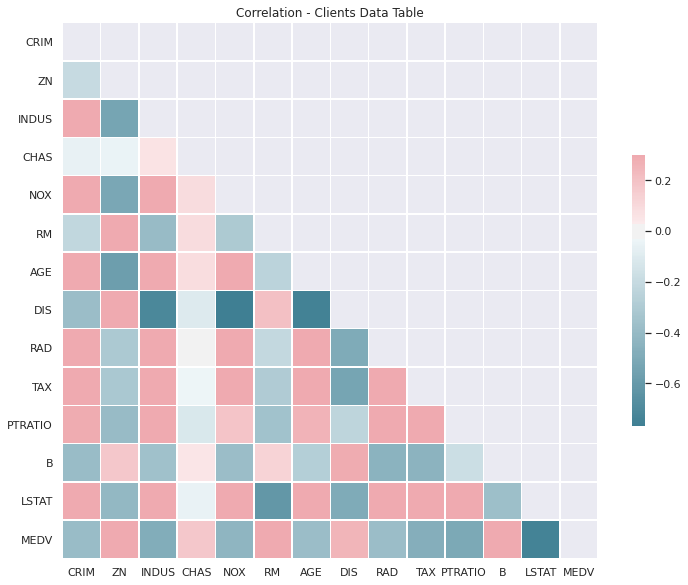

In [23]:
f, ax = plt.subplots(figsize=(12,10 ))

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation - Clients Data Table')

plt.show()

<br>

<br>

<br>

<br>


Let's filter correlation matrix and set zero the values that are lower than absolute |0.6| to have a better comprehension.

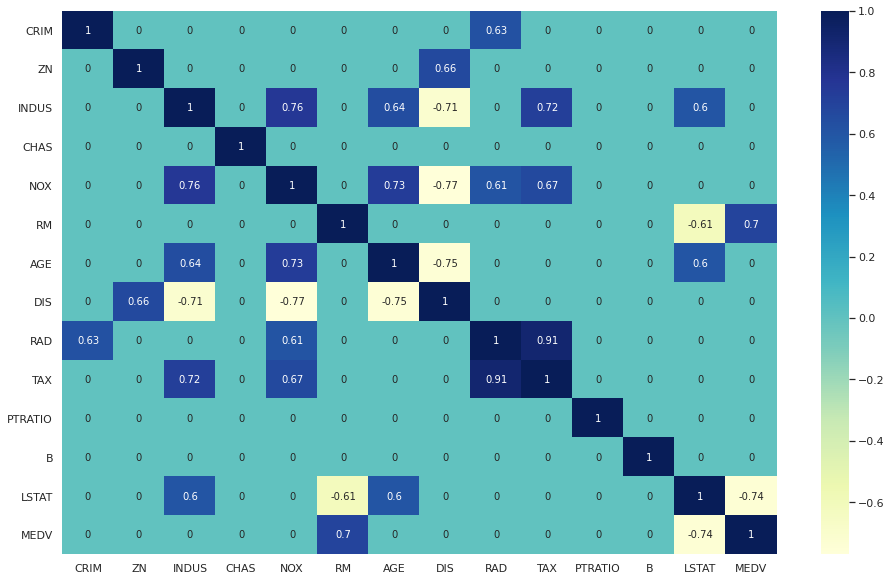

In [24]:
corr_matrix_filtered = df.corr()
corr_matrix_filtered[np.abs(corr_matrix_filtered) < 0.6] = 0 

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='YlGnBu')

plt.show()

<br>

<br>

### Method 2: Detecting Collinearity with Eigenvectors

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())
print(pd.Series(eigenvalues).sort_values())
print(f'\n\nFirst three columns are: {df.columns[2]}, {df.columns[8]}, {df.columns[9]}')

8     0.060327
9     0.134010
12    0.182987
13    0.212790
11    0.252257
10    0.277264
7     0.403077
6     0.535411
5     0.660011
4     0.850899
3     0.886540
2     1.348906
1     1.649532
0     6.545990
dtype: float64


First three columns are: INDUS, RAD, TAX


<br>

#### Observation
- Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small values represent the presence of collinearity. 
- For more information about Eigenvectors and Eigenvalues, follow this [link](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
<br>



<br>

<br>


Let's dig into eigenvector decomposition and looking at them specifically and try find out what eigenvalues are most related to specifically index 8.

In [26]:
print(np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False),'\n\n')


9     0.698822
8     0.634975
2     0.235473
13    0.134127
1     0.096297
4     0.087649
12    0.083144
0     0.059114
10    0.055738
7     0.047124
6     0.038227
3     0.023489
11    0.016165
5     0.007191
dtype: float64 




In [27]:
print(f'{df.columns[9]}, {df.columns[8]}, {df.columns[2]}')

TAX, RAD, INDUS


<br>

#### Observation
- Note that index 9, 8, 2 have very high loading when compared against the rest. They contribute the most to the low value of index 8 eigenvalue.
- These are the factors that are causing multicollinearity problem

<br>

<br>


<br>

<br>

## Feature Importance and Extractions

There are 13 features in the Boston Housing dataset.

- Are they all equally important?
- Which features are more important?

<br>

<br>

### AdaBoost

          feature
LSTAT    0.430179
RM       0.235896
DIS      0.137436
PTRATIO  0.041850
NOX      0.037114
CRIM     0.031048
B        0.021933
TAX      0.021889
RAD      0.018937
INDUS    0.010837
AGE      0.009588
ZN       0.002438
CHAS     0.000855 




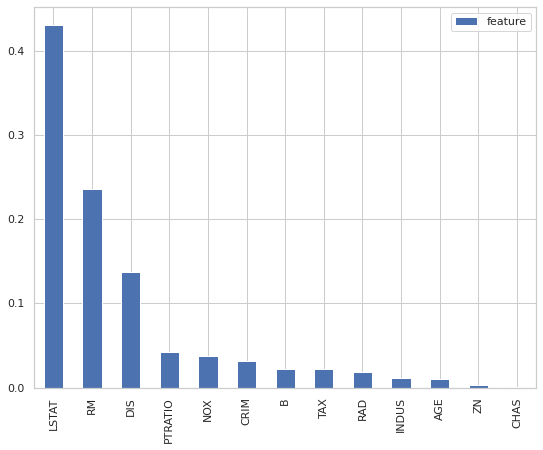

In [28]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set_style('whitegrid')
%matplotlib inline

# Reading the file
df = pd.read_csv('./Data/housing.data',delim_whitespace=True,header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Selecting feature
X = df.loc[:, df.columns != 'MEDV'].values 
y = df['MEDV']  
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Training model
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, 
                        random_state=42)
ada.fit(X_train,y_train)


# Most Important Features
df_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
result = pd.DataFrame(ada.feature_importances_, df_columns)
result.columns = ['feature']
print(result.sort_values(by='feature', ascending=False), '\n\n')


# Visualiuze Important Features
result.sort_values(by='feature', ascending=False).plot(kind='bar', figsize=(9,7))
plt.show()

<br>

<br>

### Random Forest

          feature
LSTAT    0.414411
RM       0.403853
DIS      0.062808
CRIM     0.032138
PTRATIO  0.018331
NOX      0.015085
AGE      0.014140
B        0.012799
TAX      0.012007
INDUS    0.006775
RAD      0.004672
ZN       0.001668
CHAS     0.001311 




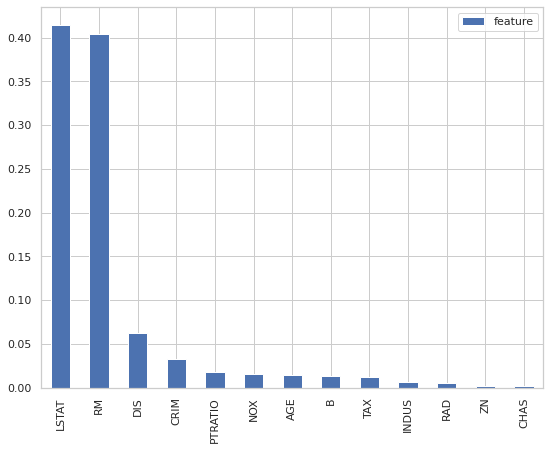

In [29]:
# Importing modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
%matplotlib inline

# Reading the file
df = pd.read_csv('./Data/housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# Selecting feature
X = df.loc[:, df.columns != 'MEDV'].values 
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Training model
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse',
                               random_state=42,
                               n_jobs=-1)
forest.fit(X_train, y_train)


# Important Features
df_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
result = pd.DataFrame(forest.feature_importances_, df_columns)
result.columns = ['feature']
print(result.sort_values(by='feature', ascending=False), '\n\n')


# Visualize Important Featrures
result.sort_values(by='feature', ascending=False).plot(kind='bar', figsize=(9,7))
plt.show()

<br>

<br>


### Decision Tree

          feature
RM       0.641241
LSTAT    0.209310
DIS      0.072147
CRIM     0.048477
NOX      0.028824
ZN       0.000000
INDUS    0.000000
CHAS     0.000000
AGE      0.000000
RAD      0.000000
TAX      0.000000
PTRATIO  0.000000
B        0.000000 




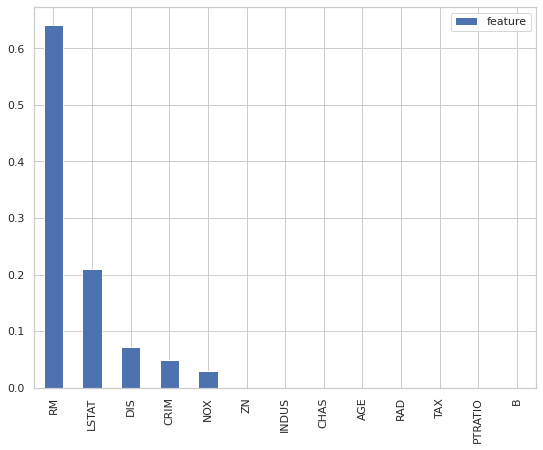

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Selecting feature
X = df.loc[:, df.columns != 'MEDV'].values 
y = df['MEDV'].values

# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=3) # If we go deeper we get more features
tree.fit(X, y)
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

# Important Features
df_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
result = pd.DataFrame(tree.feature_importances_, df_columns)
result.columns = ['feature']
print(result.sort_values(by='feature', ascending=False), '\n\n')


# Visualize Important Featrures
result.sort_values(by='feature', ascending=False).plot(kind='bar', figsize=(9,7))
plt.show()

<br>

<br>


# Regularized Method for Regression

Regularization is an approach to tackling the problem of overfitting by adding additional information, and thereby shrinking the parameter values of the model to induce the penalty against complexity. The most popular approaches to regularized linear regression are so-called **Ridge Regression**, **Least Absolute Shrinkage and Selection Operator(LASSO)** and **Elastic Net**

<br>

<br>


## Ridge Regression
- Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our least-squares function:
$$\large J(W)_{Ridge} = \sum^n_{i=1} (y^{(i)}-\hat{y}^{(i)})^2 + \lambda||w||^2_2 $$
<br>
$${L2}:\lambda||w||^2_2 = \lambda \sum^m_{j=1} {w_j}^2$$


- By increasing the value of hyperparameter $\large \lambda$ we increase the regularization strength and thereby shrink the weights of the model.
    - We do not regularize the intercept ($\large w_{0}$)


Liear Regression Coefficient Estimate: [0.92796845]
Ridge Regression Coefficient Estimate: [0.46398423]




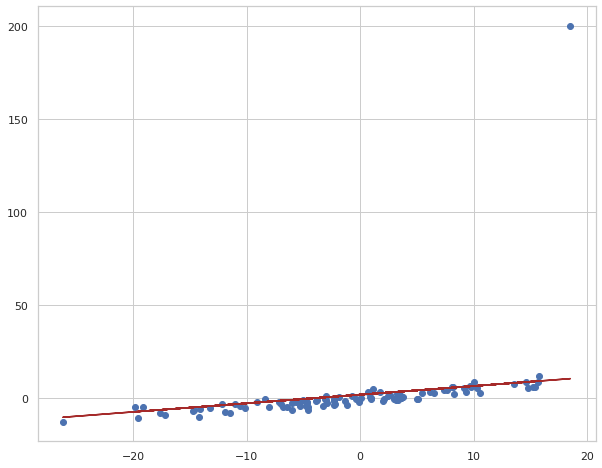

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Generating random numbers
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10  # generate 100 normal random number and multiply them by 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)   # 0.5 = slope,  2 * np.random.randn(n_samples)=> noise or outliers


# Add outlier
idx = rng.argmax()  
y_gen[idx] = 200


# Linear Regression Training
lr_model = LinearRegression(normalize=True)
lr_model.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr_model.predict(rng.reshape(-1,1))


# Ridge Regresison Training 
ridge_mod = Ridge(alpha=1, normalize=True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))


# Visualization based on ridge model 
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred, color='brown');

print(f"Liear Regression Coefficient Estimate: {lr_model.coef_}")
print(f"Ridge Regression Coefficient Estimate: {ridge_mod.coef_}\n\n")

plt.show()

<br>

<br>

#### Observation
- We can see that by considering the coefficient estimate that *Ridge Regression* is better than *Linear Regression* and it was not as badly affected as the linear regression.

<br>

<br>


## LASSO Regression

- An alternative approach that can lead to sparse models is LASSO. Depending on regularization strength, certain weigths can become zero, which makes LASSO useful as a supervised feature selection technique.

$$\large J(W)_{LASSO} = \sum^n_{i=1} (y^{(i)}-\hat{y}^{(i)})^2 + \lambda||w||_1 $$
<br>
$${L1}:\lambda||w||_1 = \lambda \sum^m_{j=1} {|w_j|}$$

- The beauty of LASSO is that, if certain independent variables are correlated, it would drop it off. For example if X2 and X4 are correlated, LASSO would drop either X2 or X4. However, Ridge Regression is different. Ridge Regression would actually give it a weight or regularize it with a penalty. On the other hand, Linear Regression, wouldn't pick up the collinearity at all.


Liear Regression Coefficient Estimate: [0.92796845]
LASSO Regression Coefficient Estimate: [0.48530263]




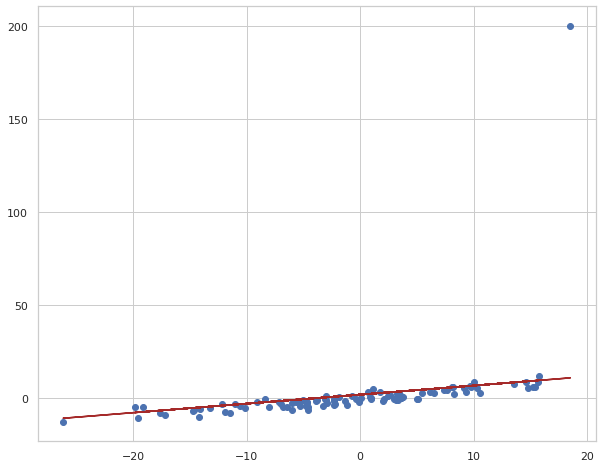

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Generating random numbers
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10  # generate 100 normal random number and multiply them by 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)   # 0.5 = slope,  2 * np.random.randn(n_samples)=> noise or outliers


# Add outlier
idx = rng.argmax()  
y_gen[idx] = 200


# Linear Regression Training
lr_model = LinearRegression(normalize=True)
lr_model.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr_model.predict(rng.reshape(-1,1))


# LASSO Regresison Training 
lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))


# Visualization based on ridge model 
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred, color='brown');

print(f"Liear Regression Coefficient Estimate: {lr_model.coef_}")
print(f"LASSO Regression Coefficient Estimate: {lasso_mod.coef_}\n\n")

plt.show()

<br>

<br>

## Elastic Net Regression

- A linear regression model trained with L1 and L2 prior as regularizer. 
- This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
- Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
- A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

<br>

$$\large J(w)_{ElasticNet} = \sum^n_{i=1} (y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum^m_{j=1} {w_j}^2 + \lambda_2 \sum^m_{j=1} {|w_j|}  $$

<br>

<br>


Liear Regression Coefficient Estimate: [0.92796845]
Elastic Net Regression Coefficient Estimate: [0.4584509]




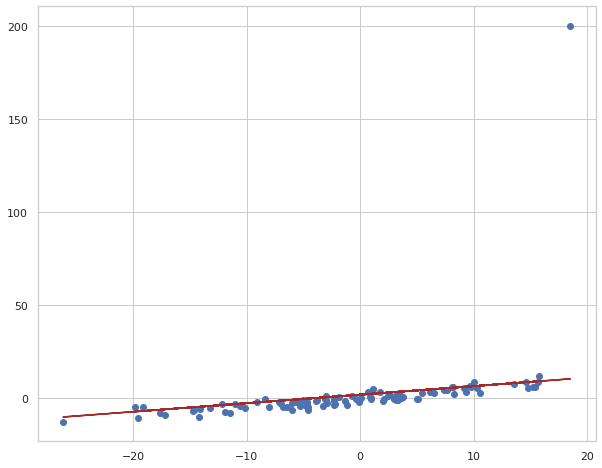

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

# Generating random numbers
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10  # generate 100 normal random number and multiply them by 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)   # 0.5 = slope,  2 * np.random.randn(n_samples)=> noise or outliers


# Add outlier
idx = rng.argmax()  
y_gen[idx] = 200


# Linear Regression Training
lr_model = LinearRegression(normalize=True)
lr_model.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr_model.predict(rng.reshape(-1,1))


# Elastic Net Regresison Training 
enlr_mod = ElasticNet(alpha=0.02, normalize=True)
enlr_mod.fit(rng.reshape(-1, 1), y_gen)
enlr_model_pred = enlr_mod.predict(rng.reshape(-1,1))


# Visualization based on ridge model 
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, enlr_model_pred, color='brown');

print(f"Liear Regression Coefficient Estimate: {lr_model.coef_}")
print(f"Elastic Net Regression Coefficient Estimate: {enlr_mod.coef_}\n\n")

plt.show()


<br>

<br>

# Summary

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**When should I use Lasso, Ridge or Elastic Net?**

- Ridge regression can't zero out coefficients; You either end up including all the coefficients in the model, or none of them. 

- LASSO does both parameter shrinkage and variable selection automatically. 

- If some of your covariates are highly correlated, you may want to look at the Elastic Net instead of the LASSO.

# Other References

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

<br>

---

<br>


# Polynomial Regression

[Polynomial regression: extending linear models with basis functions](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

$$\large w_0 + w_1x + w_2x^2 + ... + w_dx^d$$

Here, *d* denotes the degree of polynomial.

- For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data: 

$$\large \hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

- If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\large \hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$


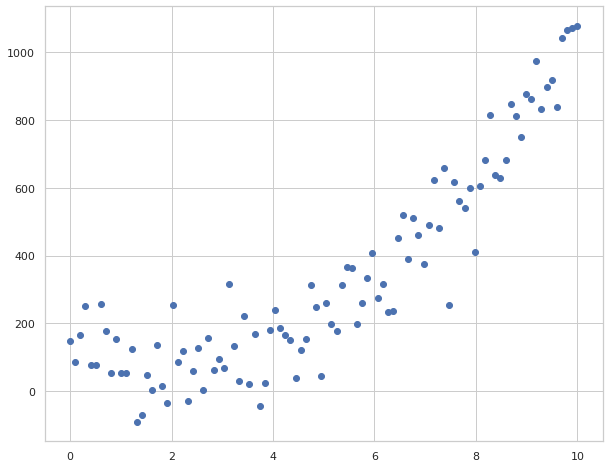

In [34]:
# Generate random data points
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)  # Return evenly spaced numbers over a specified interval.
rng = np.random.randn(n_samples) * 100
y = X ** 3 + rng + 100

# Visualize
plt.figure(figsize=(10,8));
plt.scatter(X, y);

<br>

<br>

### Fit the curve with Linear Regression


R Squared: 0.7643394574930141



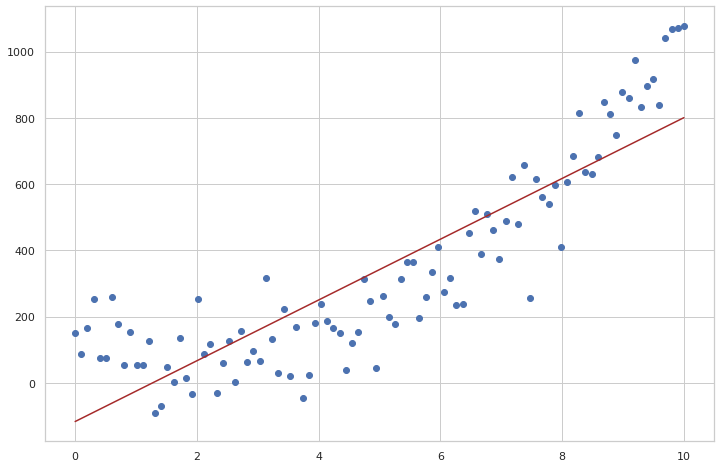

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Model training
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
y_pred = lr.predict(X.reshape(-1,1))

# Visualization
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.plot(X,y_pred, color='brown')

# R-squared = how well linear regresison observed the data. The higher the number, the better it is.
print(f'\nR Squared: {r2_score(y,y_pred)}\n') 
plt.show()


R Squared: 0.9173858308909386



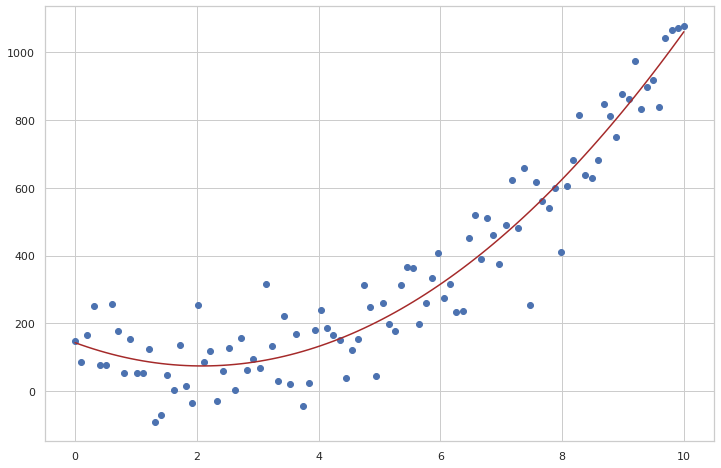

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Model training
poly_reg = PolynomialFeatures(degree=2) # 2 degree
X_poly = poly_reg.fit_transform(X.reshape(-1,1))
lin_regression = LinearRegression()  # going through fitting our linear regression using the transformed data
lin_regression.fit(X_poly, y.reshape(-1,1))
y_pred = lin_regression.predict(X_poly)

# Visualization
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.plot(X,y_pred, color='brown')
print(f'\nR Squared: {r2_score(y,y_pred)}\n') 
plt.show()

<br>

#### Observation
- The transformed data or th epolynomial can actually follow or explain the distribution or underlying properties much better.
- $R{^2}$ is substantially higher.

<br>

<br>

### Apply Linear Regression and Ploynomial Regression on Boston Housing Datatset 

In [37]:
df_boston = pd.read_csv('Data/housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
# DIS = weighted distances to five Boston employment centres
# NOX = nitric oxides concentration (parts per 10 million)

X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

In [39]:
print(f"Correlation between DIS and NOX is: {df_boston['DIS'].corr(df_boston['NOX']):0.3}")

Correlation between DIS and NOX is: -0.769


<br>

<br>

#### Linear Regression

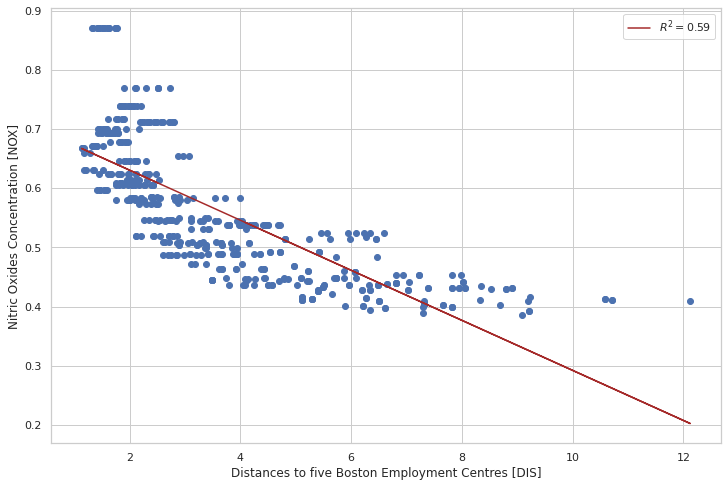

In [40]:
from sklearn.linear_model import LinearRegression

# Model training
lr = LinearRegression()
lr.fit(X_boston.reshape(-1,1), y_boston)
y_pred = lr.predict(X_boston.reshape(-1,1))

# Visualization
plt.figure(figsize=(12,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_boston,
         y_pred, 
         color='brown', 
         label=f'$R^2 = {r2_score(y_boston,y_pred):.2}$')
plt.xlabel('Distances to five Boston Employment Centres [DIS]')
plt.ylabel('Nitric Oxides Concentration [NOX]')
plt.legend(loc='upper right')

plt.show()

<br>

<br>

#### Polynomial Regreesion with degree=2 (Quadratic)

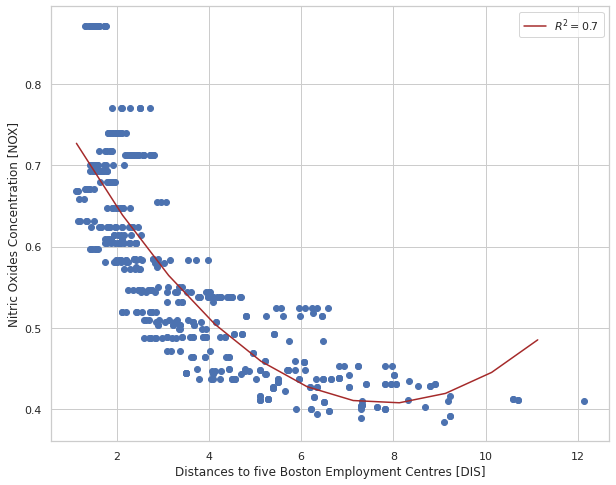

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Model training
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_b, y_boston)
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis] # We're taking the lowest and the highest point. It's for our prediction
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

# Visualization
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, 
         y_pred, 
         color='brown', 
         label=f'$R^2 = {r2_score(y_boston, lin_reg_2.predict(X_poly_b)):.2}$');
plt.xlabel('Distances to five Boston Employment Centres [DIS]')
plt.ylabel('Nitric Oxides Concentration [NOX]')
plt.legend(loc='upper right')

plt.show()

<br>

#### Observation
- $R{^2}$ has improved from 0.59 in Linear Regression to 0.7 in Quadratic Ploynomial Regression.
- We don't know to what degree we would get a better result, thus we need to try other degrees as well.

<br>


<br>

<br>

#### Polynomial Regreesion with degree=3 (Cubic)

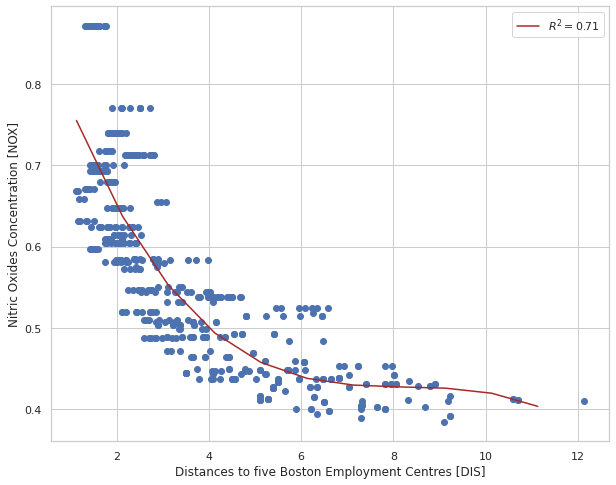

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Model training
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_b, y_boston)
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis] # We're taking the lowest and the highest point. It's for our prediction
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

# Visualization
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, 
         y_pred, 
         color='brown', 
         label=f'$R^2 = {r2_score(y_boston, lin_reg_3.predict(X_poly_b)):.2}$')
plt.xlabel('Distances to five Boston Employment Centres [DIS]')
plt.ylabel('Nitric Oxides Concentration [NOX]')
plt.legend(loc='upper right')

plt.show()

<br>

<br>

### All Linear, Quadratic and Cubic in one

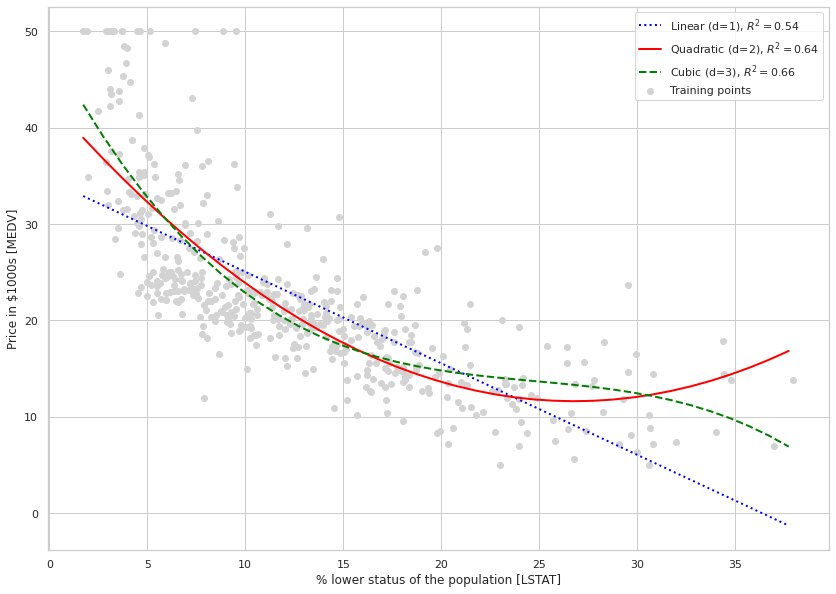

In [43]:
# LSTAT = percentage lower status of the population
# MEDV = Median value of owner-occupied homes in $1000's

X = df[['LSTAT']].values 
y = df['MEDV'].values


# create quadratic features
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.figure(figsize=(14,10))

plt.scatter(X, 
            y, 
            label='Training points', 
            color='lightgray')

plt.plot(X_fit, 
         y_lin_fit, 
         label=f'Linear (d=1), $R^2= {linear_r2:.2f}$', 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, 
         y_quad_fit, 
         label=f'Quadratic (d=2), $R^2= {quadratic_r2:.2f}$',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, 
         y_cubic_fit, 
         label=f'Cubic (d=3), $R^2= {cubic_r2:.2f}$',
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

# plt.savefig('images/10_12.png', dpi=300)

plt.show()

<br>

<br>

#### Observation
- As we can see, the cubic fit captures the relationship between *MEDV* and *LSTAT* better than linear and quadratic fit. However, we should be aware that adding more and more polynomial features increases the complexity of a model and therefore increases the chance of overfitting.

<br>

<br>


---

<br>

# Nonlinear Relationships using Random Forests

- A random forest is an ensemble of multiple decision trees.
- In decision tree we subdivide the input space into smaller regions that become more manageable.

<br>

<br>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/housing.data',delim_whitespace=True,header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<br>

<br>

## Decision Tree

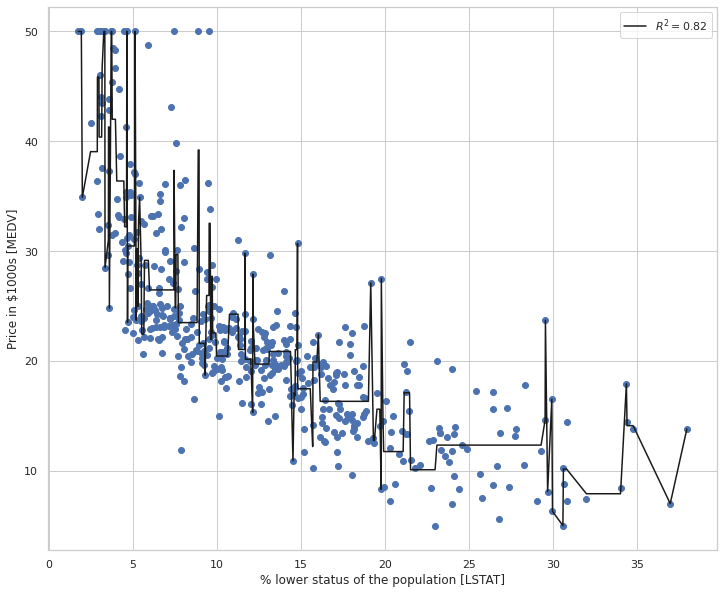

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecting feature
X = df[['LSTAT']].values
y = df['MEDV'].values

# Training model
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(X, y)
sort_idx = X.flatten().argsort() # This is only for plotting purpose, we flatten the X. The index of the values are stored in sort_idx

# Visualization
plt.figure(figsize=(12,10))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]), color='k',label=f'$R^2 = {r2_score(y, tree.predict(X)):.2}$')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

<br>

#### Observation
- These messy ups and downs tells us that we have overfitted. We need to tune our tree.
- An advantage of decision tree algorithm is that id doesnot need any transformation of features if we are dealing with nonlinear data.

<br>

<br>

<br>

<br>


Let's try max_depth=2 instead

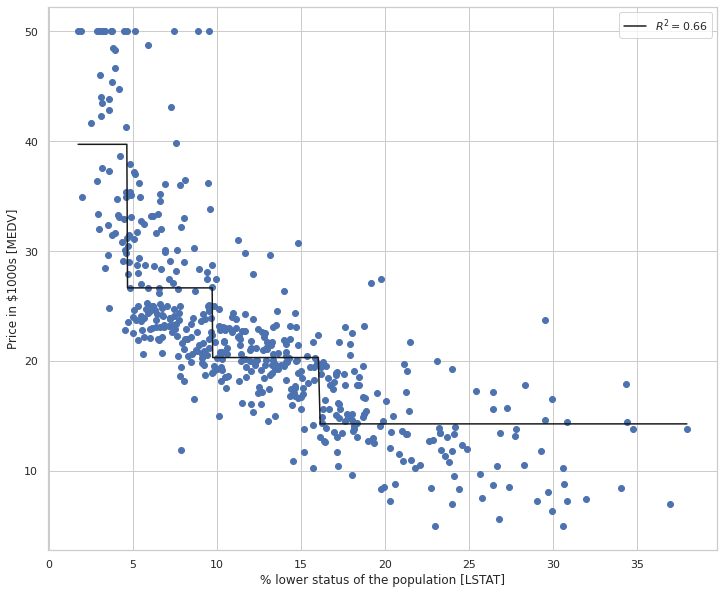

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecting feature
X = df[['LSTAT']].values
y = df['MEDV'].values

# Training model
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort() # This is only for plotting purpose, we flatten the X. The index of the values are stored in sort_idx

# Visualization
plt.figure(figsize=(12,10))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]), color='k',label=f'$R^2 = {r2_score(y, tree.predict(X)):.2}$')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

<br>

<br>

## Random Forest


MSE = train: 1.8700, test: 9.3921
R^2 = train: 0.9787, test: 0.8740



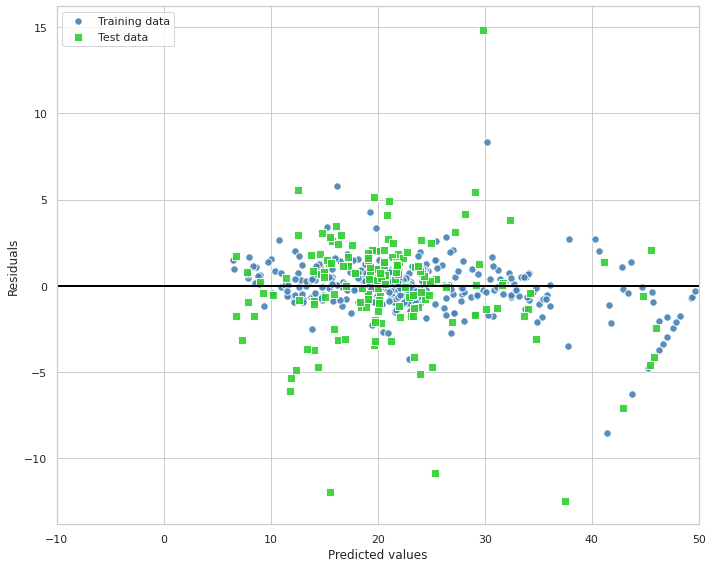

In [47]:
# Importing modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Selecting feature
X = df.loc[:, df.columns != 'MEDV'].values 
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# Training model
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42,n_jobs=-1)
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)


# Results
print(f'\nMSE = train: {mean_squared_error(y_train,y_pred_train):.4f}, test: { mean_squared_error(y_test,y_pred_test):.4f}')

print(f'R^2 = train: {r2_score(y_train,y_pred_train):.4f}, test: {r2_score(y_test,y_pred_test):.4f}\n')


# Visualize the distribution of the residuals of the predictions
plt.figure(figsize=(10,8))
plt.scatter(y_pred_train,  
            y_pred_train - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=55,
            alpha=0.9,
            label='Training data')
plt.scatter(y_pred_test,  
            y_pred_test - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=55,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

<br>

#### Observation 
- A random forest algorithm usually has a better generalization performance than an individual decision tree due to randomness, which helps to decrease the model's variance.
- Random forest are less sensitive to outliers and don't require much parameter tuning.
- The only parameter that we typically need to experiment with is the number of trees in the ensemble.
- It seems that the random forest tends to overfit the training data. (Train $R^2$ = 0.97) and (Test $R^2$ = 0.87)
- The distribution of the residual does not seem does not seem to be completely random around the zero center point, however, it indicates a large improvement in comparison with the linear model.

<br>

<br>

<br>

<br>


# References

- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750/ref=pd_sbs_14_4/139-1231297-4224847?_encoding=UTF8&pd_rd_i=1789955750&pd_rd_r=28c35682-1e2c-41af-abe2-a95451b81c0b&pd_rd_w=W1piY&pd_rd_wg=FnKwk&pf_rd_p=d28ef93e-22cf-4527-b60a-90c984b5663d&pf_rd_r=NF5RDCHV6AJ17AJGBMQC&psc=1&refRID=NF5RDCHV6AJ17AJGBMQC)

<!-- - [Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=pd_sbs_14_1/139-1231297-4224847?_encoding=UTF8&pd_rd_i=1492032646&pd_rd_r=e6082163-ab1f-4661-a8ba-4f8cab482237&pd_rd_w=RG566&pd_rd_wg=iTSEv&pf_rd_p=d28ef93e-22cf-4527-b60a-90c984b5663d&pf_rd_r=CHET6HF1NNAMAGCBQ2QC&psc=1&refRID=CHET6HF1NNAMAGCBQ2QC)
 -->

<br>

<br>

---